In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Clustering Colors from an Image

(480, 640, 3)

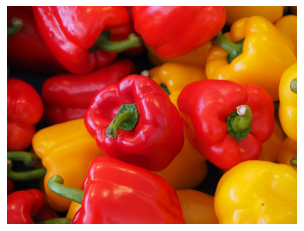

In [66]:
# load image
img = plt.imread('peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');
img.shape

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

In [4]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

(307200, 3)


(307200, 3)

In [71]:
# Question1 Apply k-means Algorithm
X = img_flat
kmean = KMeans(n_clusters=20)
kmean.fit(X)

KMeans(n_clusters=20)

In [72]:
#Question 2
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]
print(len(kmean.labels_))


307200


In [73]:
for c in kmean.cluster_centers_:
    print(c)
    
np.unique(kmean.labels_)

[219.94446608  21.76514119  15.59272963]
[104.8224187  108.36040761  30.62760378]
[231.52931589 153.04211881   2.24885267]
[203.18554092  31.61937079  37.73888537]
[231.45538178 162.40409384 191.01471941]
[115.95145965  10.13182599   4.84590727]
[149.08246749  51.28492549   1.46719706]
[157.5889642    6.91495446   6.42490998]
[244.60313798 197.47046608  71.61975081]
[236.36181537  41.77949781  37.51921827]
[69.96531246 10.48049669  2.42239169]
[60.97217929 62.64142195 17.33158959]
[138.37642948 151.20139771  96.90724269]
[211.30091792 116.49088732   2.13402953]
[240.26701271 188.46585196   6.65349246]
[18.9993795   9.19254157  7.91834202]
[179.26222183  82.75002234   3.83573152]
[192.50401294  12.73866111   9.29347353]
[234.96096598 101.83080194 129.21339611]
[231.58062388  67.66393365  75.03307888]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [74]:
predicted_labels = kmean.predict(X)
predicted_labels

array([15, 15, 15, ...,  2,  2,  2])

In [75]:
im_new = []
for i in range(len(X)):
    #X[predicted_labels]  =0 
    im_new.append(kmean.cluster_centers_[predicted_labels[i]])

im_new = np.array(im_new).astype(int)
im_new.shape = (480, 640, 3)

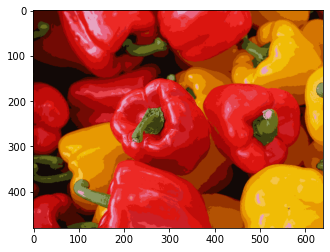

In [76]:
plt.imshow(im_new) 

# Question 3 Apply elbow method

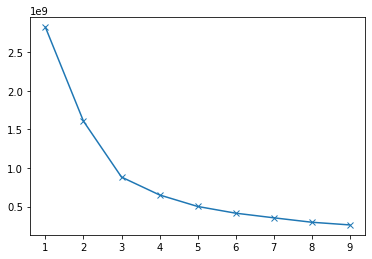

In [78]:
inertias = []
K = range(1, 10) 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    #print(kmeanModel.cluster_centers_)
    
    inertias.append(kmeanModel.inertia_)

# ploting inertia
plt.plot(K,inertias,marker= "x")